In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [28]:
# prepare the data
X = np.array(
    [
        [2., 2.1, 2.2, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0],
        [4.4,5.5, 5.3, 5.7, 6. , 6.5, 7.,  7.4, 7.8 ,8.5]
    ]   
)
y = np.array([ 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])
X

array([[2. , 2.1, 2.2, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ],
       [4.4, 5.5, 5.3, 5.7, 6. , 6.5, 7. , 7.4, 7.8, 8.5]])

In [29]:
X_new = np.array(
    [
        X[0] + rand_coef,
        X[1] + rand_coef 
    ])
X_new

array([[2.50116972, 2.75998032, 2.85282735, 2.38536097, 2.71895096,
        3.19528789, 3.31404687, 3.21961383, 3.81390004, 3.6532254 ],
       [4.90116972, 6.15998032, 5.95282735, 5.78536097, 6.21895096,
        7.09528789, 7.61404687, 7.81961383, 8.71390004, 9.1532254 ]])

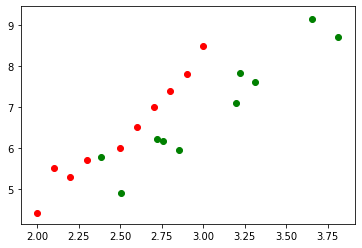

In [30]:
plt.scatter(X[0,:],X[1,:], color="red")
plt.scatter(X_new[0,:],X_new[1,:], color="green")

X_real_0 = np.append(X[0], X_new[0])
X_real_1 = np.append(X[1], X_new[1])
X_data = np.array([X_real_0, X_real_1])

y = np.append(np.zeros(18), np.ones(2))

In [31]:
colors_map = ["red", "green"]


# if-else statment like expression with logical operators used as short circuit 
# colors = map(lambda el:el and "green" or "red", y)

# if-else statment like expression with if-else expression
colors = map(lambda el: "green"  if el else "red", y)

colors = list(colors)
print(colors)

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'green']


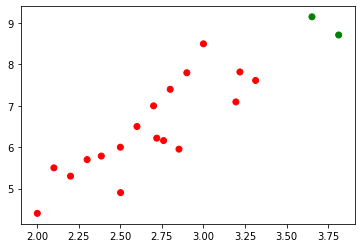

In [32]:
plt.scatter(X_data[0,:],X_data[1,:], color=colors)

In [34]:
# test with SVM and a Dummy Classifier
from sklearn import svm
from sklearn import dummy

svc = svm.SVC(gamma="auto")
dummy = dummy.DummyClassifier()

svc.fit(X_data.T, y) 
dummy.fit(X_data.T, y) 


DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [49]:
# test on same data, but first we need to transpose the input data
X_test = X_data.T

y_pred_svc = svc.predict(X_test)
y_pred_dummy = dummy.predict(X_test)

In [50]:
# evaluate the model
from sklearn.metrics import accuracy_score
print(f'accuracy_score SVC: {accuracy_score(y, y_pred_svc)}')
print(f'accuracy_score Dummy: {accuracy_score(y, y_pred_dummy)}')


accuracy_score SVC: 1.0
accuracy_score Dummy: 0.75


In [54]:
from sklearn.metrics import confusion_matrix
print(f'confusion_matrix SVC:\n {confusion_matrix(y, y_pred_svc)}\n')
print(f'confusion_matrix Dummy:\n {confusion_matrix(y, y_pred_dummy)}')

confusion_matrix SVC:
 [[18  0]
 [ 0  2]]

confusion_matrix Dummy:
 [[15  3]
 [ 2  0]]


In [57]:
from sklearn.metrics import classification_report

cls_rep_svc = classification_report(y, y_pred_svc, target_names=colors_map)
cls_rep_dummy = classification_report(y, y_pred_dummy, target_names=colors_map)

print(f'classification_report SVC: \n{cls_rep_svc}')
print(f'classification_report Dummy: \n{cls_rep_dummy}')

classification_report SVC: 
              precision    recall  f1-score   support

         red       1.00      1.00      1.00        18
       green       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

classification_report Dummy: 
              precision    recall  f1-score   support

         red       0.88      0.83      0.86        18
       green       0.00      0.00      0.00         2

    accuracy                           0.75        20
   macro avg       0.44      0.42      0.43        20
weighted avg       0.79      0.75      0.77        20

